In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[0.79179095 0.95469451 0.97219787 0.97726693 0.97988315 0.98180833
 0.98337572 0.98435076]
[0.99470062 0.9945503  0.99449465 0.9944851  0.99437305 0.99435991
 0.9942587  0.99422529]


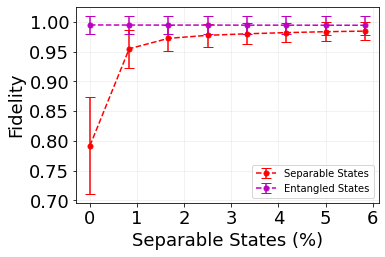

In [4]:


fidelity_list, fidelity_av, dms, pur_list, params_list, ent_list = pd.read_pickle(
    "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_MEMS_k_params_[[0.0, 1.0]]_qs_2_separability_mix_TEST.pickle")
# fidelity_list, fidelity_av, dms, pur_list, params_list, ent_list = pd.read_pickle(
#     "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_Werner_k_params_[[0.0, 1.0]]_qs_2_separability_mix_TEST_purity_gt_.25.pickle")
fids = np.array(fidelity_list).reshape(-1, 10*5000)
fids_mean_test = fids.mean(axis=1)
fids_std_test = fids.std(axis=1)


fidelity_list_valid, fidelity_av_valid, dms_valid, pur_list_valid, params_list_valid, ent_list_valid = pd.read_pickle(
    "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_MEMS_k_params_[[0.0, 1.0]]_qs_2_separability_mix_Valid_MEMS.pickle")

fids_valid = np.array(fidelity_list_valid).reshape(-1, 10*5000)
fids_mean_valid = fids_valid.mean(axis=1)
fids_std_valid = fids_valid.std(axis=1)

print(fids_mean_test)
print(fids_mean_valid)

sep_added = np.array([0, 250, 500, 750, 1000, 1250, 1500, 1750])*100/30000
colors = ['r', 'm', 'g', 'm']
i = 0
plt.errorbar(sep_added, fids_mean_test, yerr=fids_std_test, fmt=f'--{colors[i]}o', ecolor=f'{colors[i]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'Separable States')
i = 1
plt.errorbar(sep_added, fids_mean_valid, yerr=fids_std_valid, fmt=f'--{colors[i]}o', ecolor=f'{colors[i]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'Entangled States')

fs = 18
plt.grid(alpha=0.2)
plt.xlabel('Separable States (%)', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
plt.legend()
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.subplots_adjust(bottom=0.2, left=0.2)

# plt.savefig('fidelity_separable_MEMS.svg', dpi=600)
# plt.savefig('fidelity_separable_MEMS.png', dpi=600)
plt.show()
